# EDA and Data Preprocessing

Prepared by Mina Roohnavazfar 

Email: mina.roohnavazfar@yahoo.com

August 2023

### Introduction

Bike sharing systems have emerged as a new generation of transportation services, offering convenient and automated rental processes. These systems allow users to easily rent bikes from one location and return them to another, providing flexibility and accessibility for urban commuters and tourists alike. Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 

These systems have gained immense popularity due to their convenience and accessibility. With the entire process, from membership to rental and return, being automated, users can effortlessly rent bikes from one location and return them at another. Currently, there are more than 500 bike-sharing programs worldwide, featuring over 500,000 bicycles. These systems have become crucial players in addressing traffic, environmental, and health concerns.

My project aims to forecast the number of bike rentals for the years 2011 and 2012 in Washington D.C., USA. The avaiable dataset also includes crucial weather and seasonal information, as these factors play a significant role in bike-sharing rental behaviors. Weather information for the dataset is sourced from https://www.freemeteo.com , ensuring that relevant environmental conditions are taken into account during the analysis.

In this notebook, we explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 


### Data Dictionary

Our dataset (data.csv) includes the following fields:

| Features | Description |
|:------------|:------------|
| instant     | record index |
| dteday      | Date |
| season      | Season (1:springer, 2:summer, 3:fall, 4:winter) |
| yr          | Year (0: 2011, 1:2012) |
| mnth        | Month (1 to 12) |
| hr          | Hour (0 to 23) |
| holiday     | Whether day is holiday or not |
| weekday     | Day of the week |
| workingday  | If day is neither weekend nor holiday is 1, otherwise is 0. |
| weathersit  | Weather situation:<br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp        | Normalized temperature in Celsius (values divided by 41) |
| atemp       | Normalized feeling temperature in Celsius (values divided by 50) |
| hum         | Normalized humidity (values divided by 100) |
| windspeed   | Normalized wind speed (values divided by 67) |


| Target Variables | Description |
|:------------|:------------|
| casual      | Count of casual users rentals |
| registered  | Count of registered users rentals |
| cnt         | Total count of bike rentals for both casual and registered users|

### Table of contents
* Part 1: Data Exploration
* Part 2: EDA
* Part 3: Statistical Analysis
* Part 4: Preprocessing Data before Modeling
* Part 5: Insights on EDA

### Part 1: Data Exploration

In [16]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import statsmodels.api as sm
from statsmodels.api import tsa # time series analysis

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# read data from the CSV file:
df=pd.read_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 2/data.csv')

In [18]:
# sanity checks with the columns and the first 5 rows:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# remove the column 'instant' as it is just an index of cases.
df = df.drop(['instant'], axis=1)

In [20]:
# sanity checks with the first 5 rows after dropping column 'instant':
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# sanity checks with the last 5 rows:
df.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [22]:
# sanity checks with a sample of 10 rows:
df.sample(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
378,2011-01-17,1,0,1,6,1,1,0,2,0.18,0.1818,0.43,0.1940,0,5,5
11391,2012-04-24,2,1,4,20,0,2,1,1,0.48,0.4697,0.21,0.3284,16,269,285
6613,2011-10-08,4,0,10,3,0,6,0,1,0.44,0.4394,0.88,0.0000,4,16,20
7308,2011-11-06,4,0,11,3,0,0,0,1,0.24,0.2879,0.87,0.0000,5,4,9
14554,2012-09-03,3,1,9,15,1,1,0,1,0.74,0.6970,0.70,0.2239,168,281,449
6317,2011-09-25,4,0,9,19,0,0,0,1,0.64,0.5758,0.83,0.1343,87,242,329
13076,2012-07-04,3,1,7,1,1,3,0,1,0.68,0.6364,0.74,0.0000,27,96,123
12638,2012-06-15,2,1,6,19,0,5,1,1,0.70,0.6364,0.42,0.1642,98,369,467
8389,2011-12-21,1,0,12,5,0,3,1,2,0.38,0.3939,0.82,0.1045,0,28,28
12458,2012-06-08,2,1,6,7,0,5,1,1,0.52,0.5000,0.72,0.1045,19,409,428


In [23]:
# display dimensions of data:
df.shape
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 17379 rows and 16 columns.


In [24]:
# summary of mydata:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


Finding:
- All the columns have 17379.
- df contains fiftheen numerical columns. All of these columns are integer except for temp, atemp, hum, and windspeed which are Float.
- df contains only one categorical column as dteday. 

In [25]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
# convert 'dteday' column to a pandas DateTime type:
df['dteday']= pd.to_datetime(df['dteday'])
print(df['dteday'].dtype)
df['dteday']

datetime64[ns]


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [27]:
# check the number of missing values for columns:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values.

In [28]:
# check the exact duplicates rows:
df.duplicated().sum()

0

There are no duplicate rows.

In [29]:
# check for duplicated columns by transpose
df.T.duplicated() # There is no duplictaed columns in mydata.

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

There are not exact duplicate columns.

In [30]:
# we can check for mathmatically duplicated columns by correlation
# but we need to look at only numerical data
df_num = df.select_dtypes(include="number")
df_num.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


<Axes: >

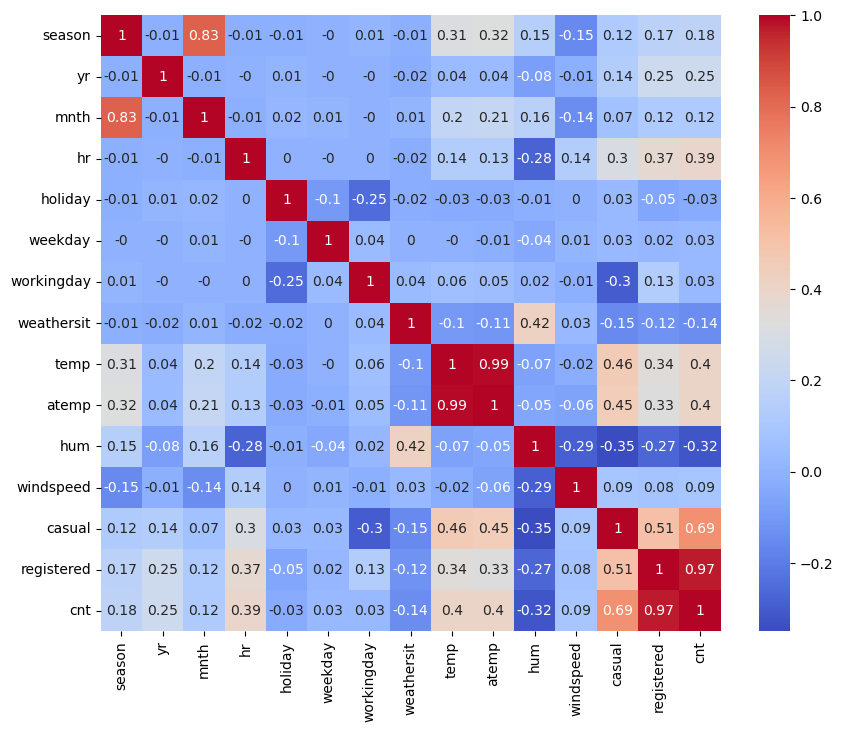

In [31]:
# display the heatmap for correlation matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(round(df_num.corr(),2),cmap='coolwarm',annot=True)

Finding:
- The columns 'month' and 'season' exhibit a strong positive correlation of approximately 0.83.
- As expected, the columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other. This is because the "cnt" values represent the total count of 'casual' and 'registered' rentals.
- 'temp' and 'atemp' are highly correlated because they are both derived from the same underlying weather conditions.

### Part 2: EDA
Here we are going to examine and visualize the dataset to gain insights, identify patterns, and understand the structure and characteristics of the data.

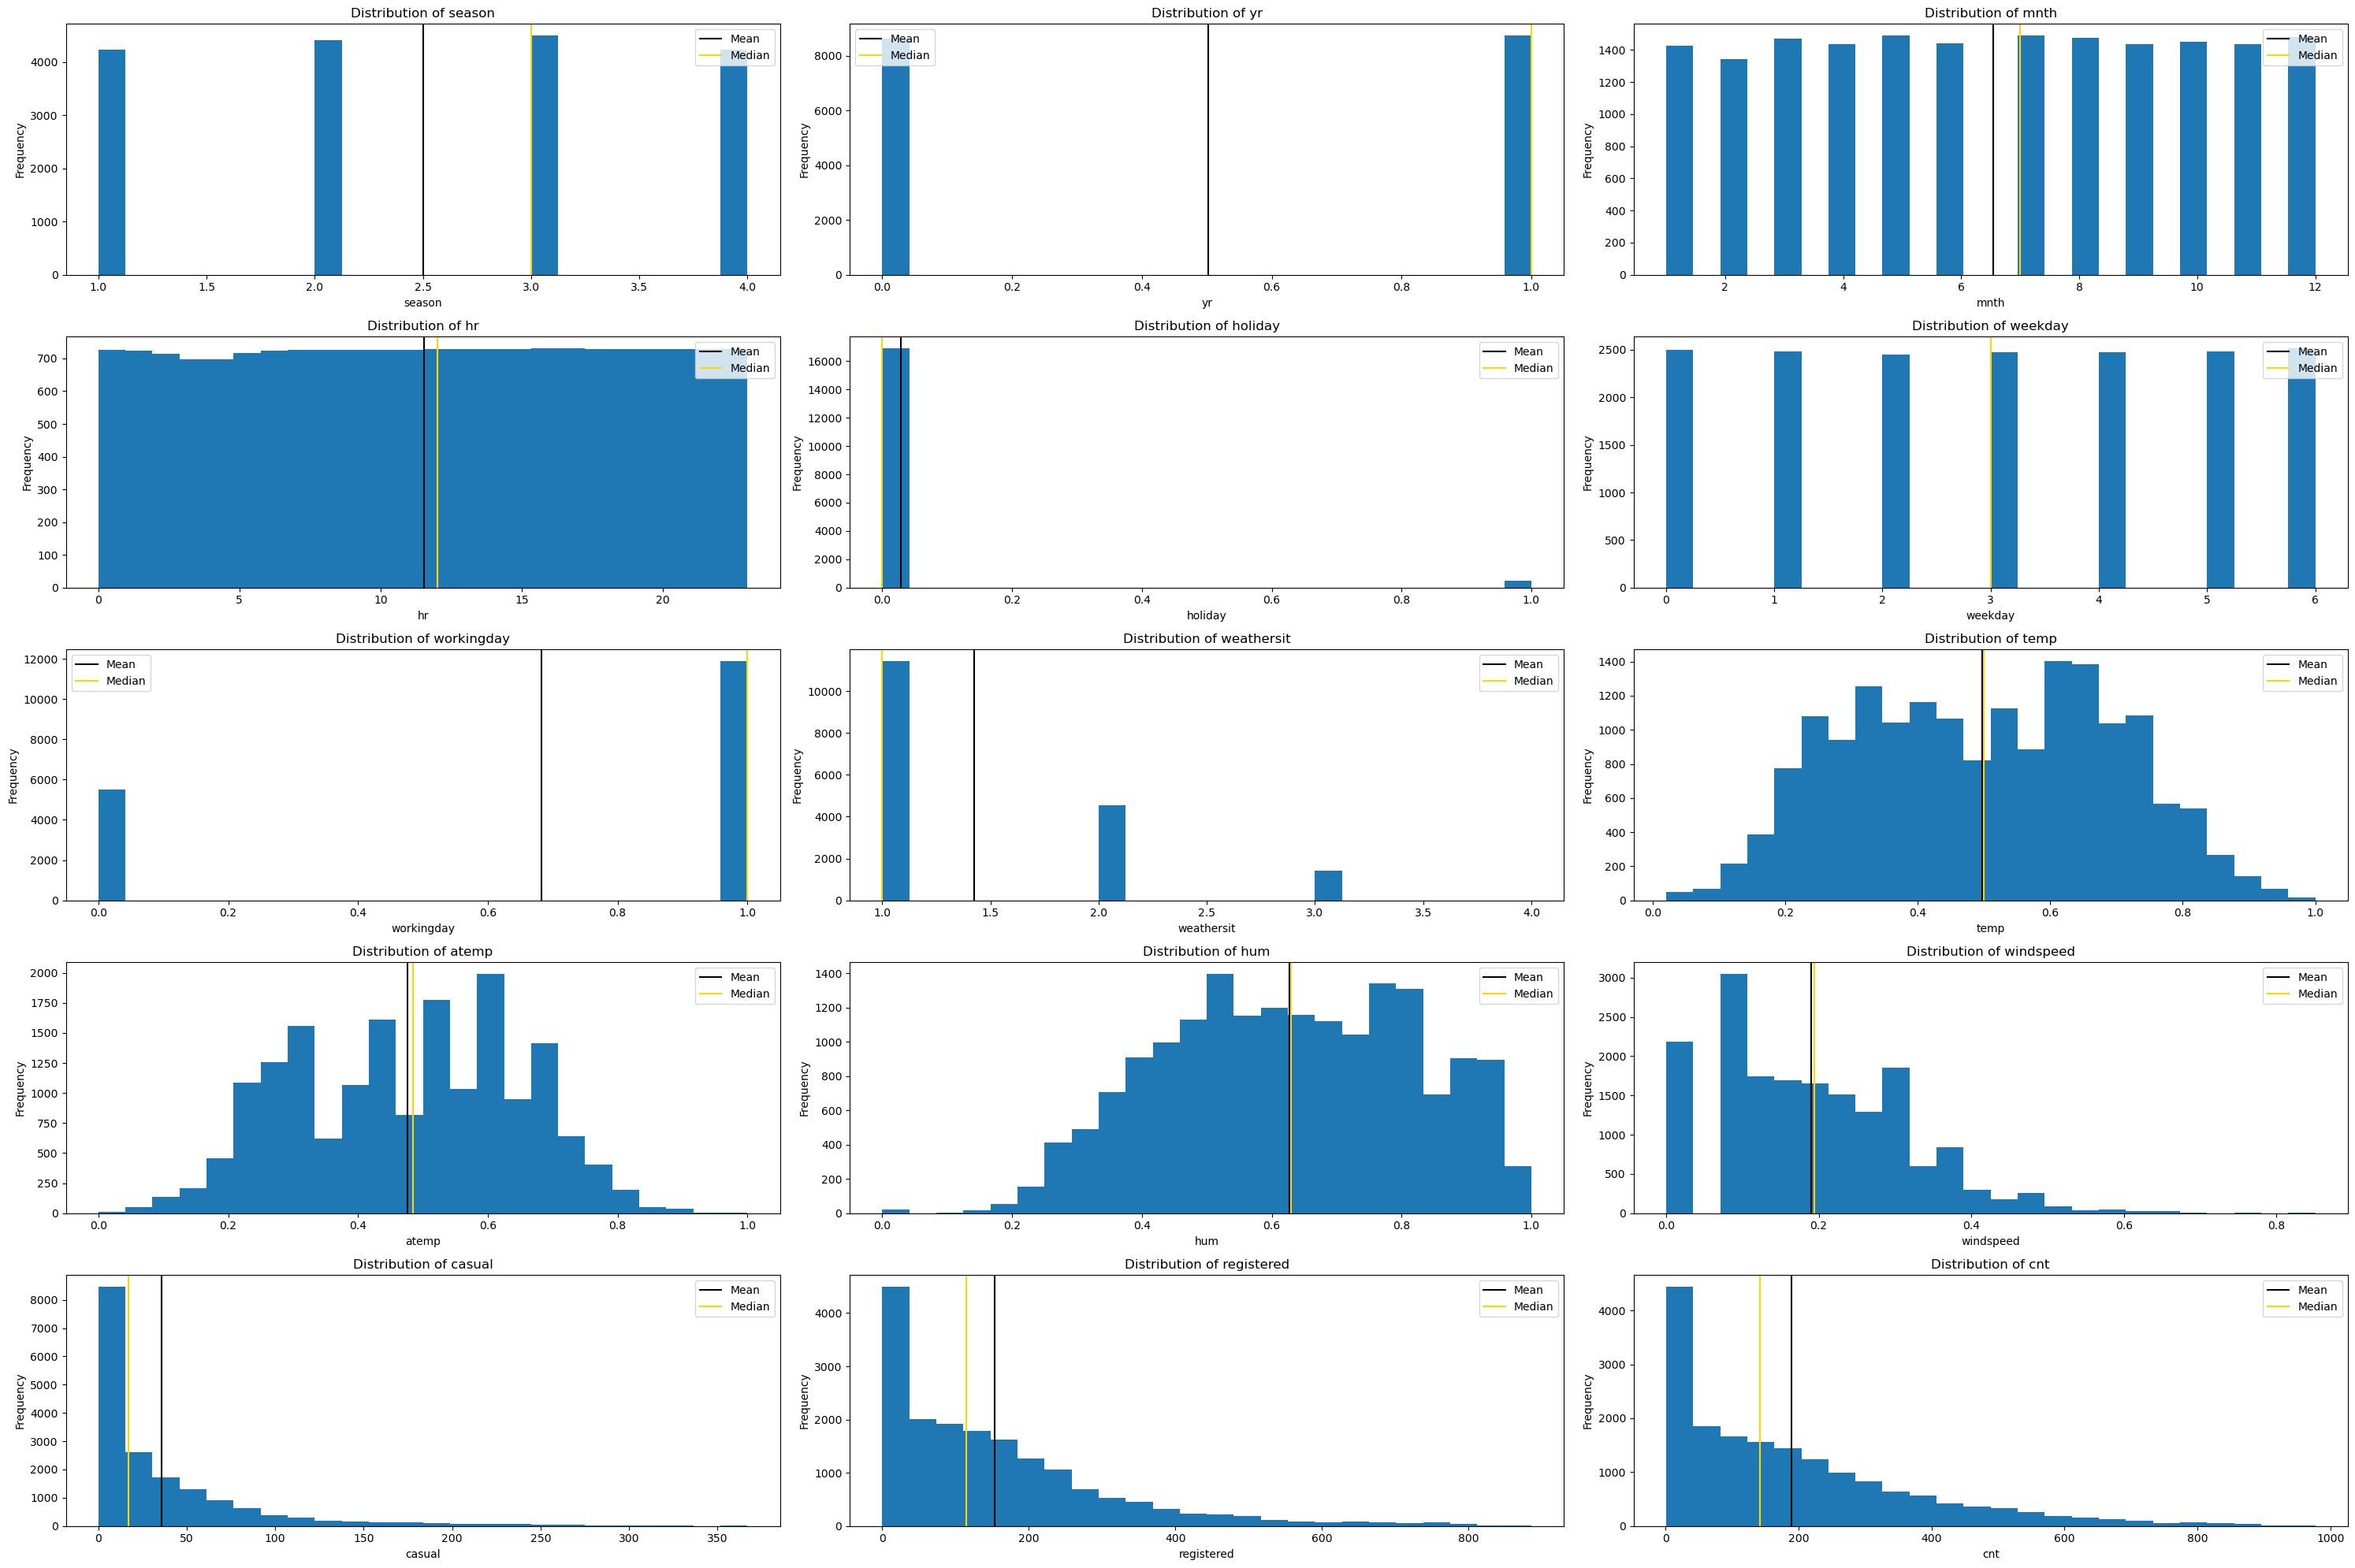

In [16]:
# We will be making 2 rows x 4 columns of subplots
plt.subplots(5,3, figsize=(30,20))

# Creating the for loop
for slot_num, column in enumerate(df_num.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(5,3,slot_num)
    plt.hist(df[column], bins=24)
    
    # Set the titles and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Adding median and mean lines
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
plt.tight_layout()

plt.show()    

Finding:
- The distribution of the 'season' variable indicates that each of the four seasons has more than 4000 records.
- The data covers a span of two years with more thn 8000 records for each year.
- The distribution of the 'month' variable shows the number of records for each month. The majority of months have more than 1400 cases, except for month 2, which has a value lower than this threshold.
- The 'hr' variable's distribution shows that there are approximately 700 records for most hours.
- The holiday distribution plot indicates that the number of records corresponding to holidays is significantly lower than the number of records for non-holiday days.
- The distribution of the 'weekday' variable suggests that each of the seven weekdays has a relatively similar number of records, with approximately less than 2500 observations each. 
- From the distribution of the 'workingday' column, it is evident that the number of records for working days is significantly higher compared to the number of records for non-working days.
- Weather situation 1 has the highest number of records, followed by weather situation 2, and then weather situation 3.
- The variables 'temp' and 'atemp' exhibit approximately normal distributions.
- The variable 'hum' is slightly left-skewed.
- The variable 'windspeed' displays a right-skewed distribution.
- The Target variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution. This columns may have zero values. To address this skewness, there are a number of ways such as adding value 1 to variables and then log transformation, root square, cube root square,... . we apply a log transformation to target variables as they lead to better result, in this project.

In [32]:
# Dealing with skewness by log transformation for the three target variables 'casual', 'registered', and 'cnt':
df['t_casual'] =  np.log(df['casual']+1)  # constant one is added to variables to be greater than zero.
df['t_registered'] =  np.log(df['registered']+1)
df['t_cnt'] =  np.log(df['cnt']+1)

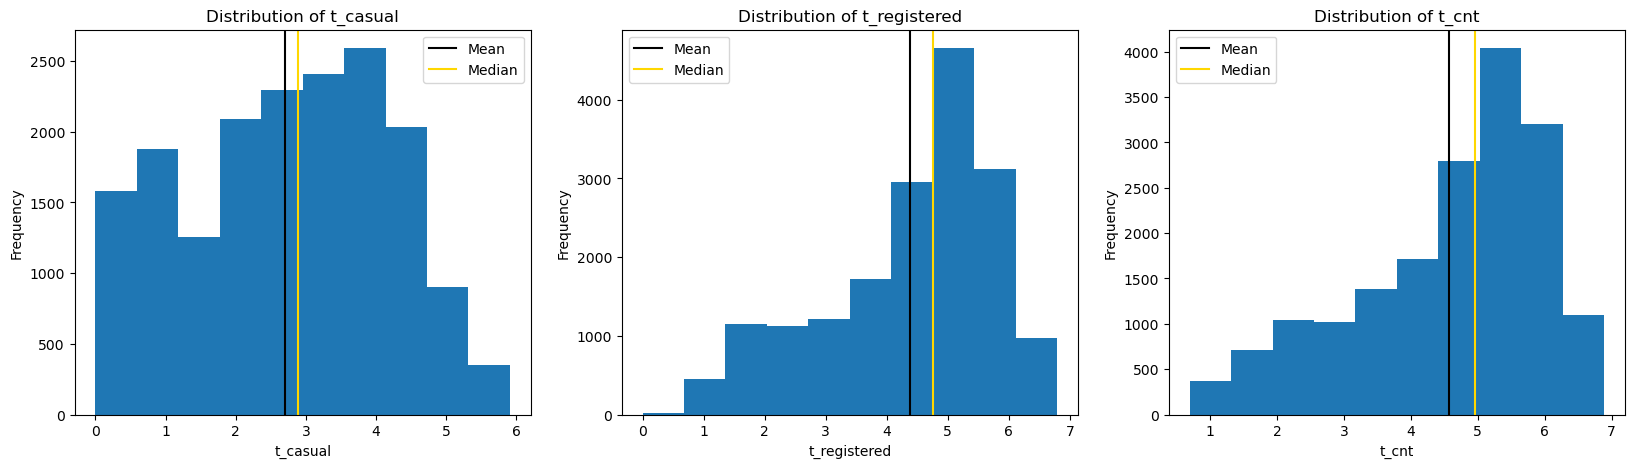

In [33]:
# We will be making 1 rows x 3 columns of subplots for the three transformed target variables
t_uers=['t_casual','t_registered','t_cnt']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    plt.hist(df[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
    i += 1
plt.show()   

Finding:
- The transformed target variables 't_casual', 't_registered', and 't_cnt' demonstrate reduced skewness compared to their original distributions.

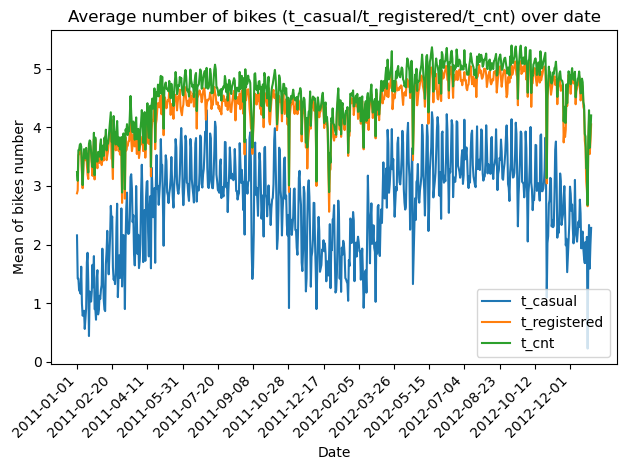

In [19]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over date:
dteday_casual = df.groupby('dteday')['t_casual'].mean()  # average of t_casual over date
dteday_registered = df.groupby('dteday')['t_registered'].mean()  # average of t_registered over date
dteday_cnt = df.groupby('dteday')['t_cnt'].mean()  # average of t_cnt over date

# Create a list of dates for the x-axis ticks
dates = df['dteday'].unique()

plt.figure()
plt.plot(dates, dteday_casual, label='t_casual')
plt.plot(dates, dteday_registered, label='t_registered')
plt.plot(dates, dteday_cnt, label='t_cnt')

plt.xlabel("Date")
plt.ylabel("Mean of bikes number")
plt.title("Daily Average Bike Rentals (t_casual/t_registered/t_cnt)")

# Set x-axis ticks at every 50th data point
plt.xticks(dates[::50], rotation=45, ha='right') 

plt.legend()
plt.tight_layout()
plt.show()

Finding:
- Over the two years (2011-2012), it is evident that the average number of bikes rented by casual users is lower than that of registered users. As expected, the average value for 'cnt' (total count) is higher than both 'casual' and 'registered', given that 'cnt' represents the sum of 'casual' and 'registered' bike rentals.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.

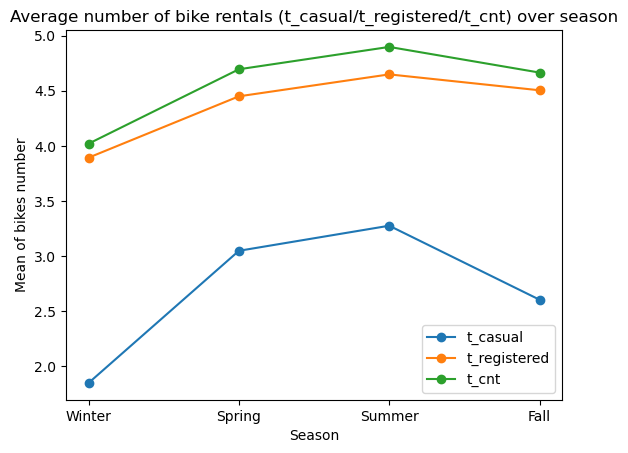

In [20]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over season:
season_casual = df.groupby('season')['t_casual'].mean()  # average of t_casual over season
season_registered = df.groupby('season')['t_registered'].mean()  # average of t_registered over season
season_cnt = df.groupby('season')['t_cnt'].mean()  # average of t_cnt over season

# Set the x-axis ticks and labels
seasons = ['Winter','Spring', 'Summer', 'Fall'] 
season_labels = [1, 2, 3, 4]

plt.figure()
plt.plot(season_labels, season_casual, label='t_casual',marker='o')
plt.plot(season_labels, season_registered, label='t_registered',marker='o')
plt.plot(season_labels, season_cnt, label='t_cnt',marker='o')

plt.xticks(season_labels, seasons)  # Set the x-axis ticks to the season numbers
plt.xlabel("Season")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over season")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- On average, the 'cnt' variable exhibits the highest average number of rental bikes, followed by registered users and then casual users.

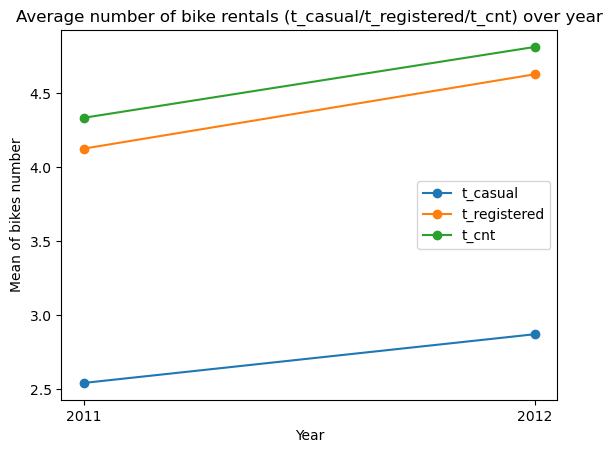

In [21]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over year:
yr_casual = df.groupby('yr')['t_casual'].mean()  # average of t_casual over year
yr_registered = df.groupby('yr')['t_registered'].mean()  # average of t_registered over year
yr_cnt = df.groupby('yr')['t_cnt'].mean()  # average of t_cnt over year

# Set the x-axis ticks and labels
year = ['2011', '2012']

plt.figure()
plt.plot(year, yr_casual, label='t_casual',marker='o')
plt.plot(year, yr_registered, label='t_registered',marker='o')
plt.plot(year, yr_cnt, label='t_cnt',marker='o')

plt.xlabel("Year")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over year")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals increased in the year 2012 compared to the year 2011. - The slope of this increasing trend is larger for registered users than for casual users, indicating a more substantial increase in bike rentals for registered users over the two years.

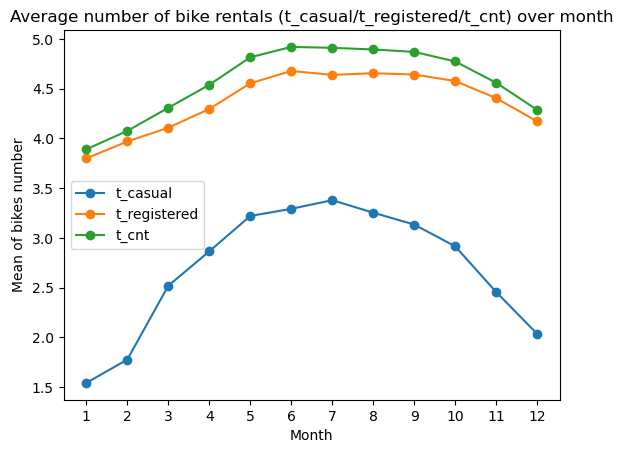

In [22]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over month:
mnth_casual = df.groupby('mnth')['t_casual'].mean()  # average of t_casual over month
mnth_registered = df.groupby('mnth')['t_registered'].mean()  # average of t_registered over month
mnth_cnt = df.groupby('mnth')['t_cnt'].mean()  # average of t_cnt over month

plt.figure()
plt.plot(mnth_casual, label='t_casual',marker='o')
plt.plot(mnth_registered, label='t_registered',marker='o')
plt.plot(mnth_cnt, label='t_cnt',marker='o')
plt.xlabel("Month")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over month")
plt.xticks(range(1, 13), range(1, 13))  # Set the x-axis ticks and labels to show months from 1 to 12
plt.legend()
plt.show()

Finding:
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- Overall, the average number of rental bikes for registered users is higher than the value for casual users.

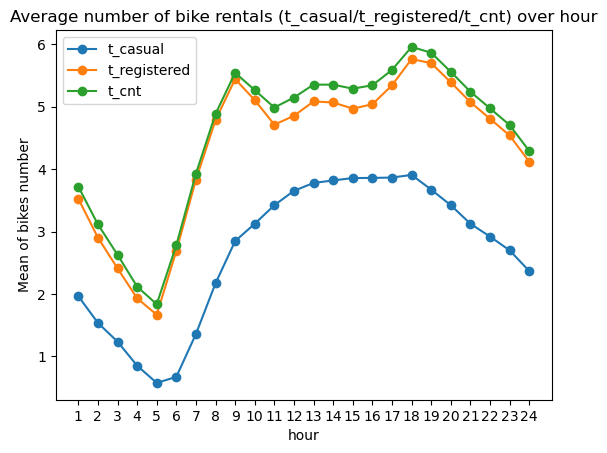

In [23]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over hour:
hr_casual=df.groupby('hr')['t_casual'].mean() # average of t_casual over hour
hr_registered=df.groupby('hr')['t_registered'].mean() # average of t_registered over hour
hr_cnt=df.groupby('hr')['t_cnt'].mean() # average of t_cnt over hour

plt.figure()
plt.plot(hr_casual,label='t_casual',marker='o')
plt.plot(hr_registered,label='t_registered',marker='o')
plt.plot(hr_cnt, label='t_cnt',marker='o')
plt.xlabel("hour")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over hour")
plt.xticks(range(0, 24), range(1, 25))  # Set the x-axis ticks and labels to show hours from 1 to 24
plt.legend()
plt.show()

Finding: 
- The distribution of rental bike numbers varies, on average, throughout the hours of a day for both casual and registered users.
- For casual users, the average rental bike numbers increase during the hours between 5 and 18.
- For registered users, the average rental bike numbers exhibit two distinct peaks at hours 9 and 18.
- In general, the average number of rental bikes for registered users surpasses that of casual users.

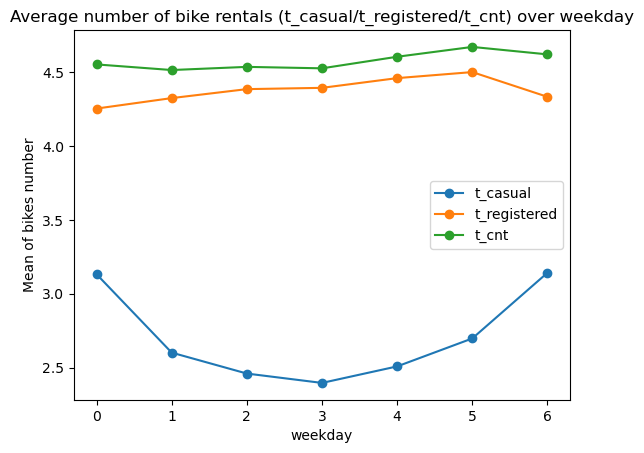

In [24]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over weekday:
weekday_casual=df.groupby('weekday')['t_casual'].mean() # average of t_casual over weekday
weekday_registered=df.groupby('weekday')['t_registered'].mean() # average of t_registered over weekday
weekday_cnt=df.groupby('weekday')['t_cnt'].mean() # average of t_cnt over weekday

plt.figure()
plt.plot(weekday_casual,label='t_casual',marker='o')
plt.plot(weekday_registered,label='t_registered',marker='o')
plt.plot(weekday_cnt, label='t_cnt',marker='o')
plt.xlabel("weekday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weekday")
plt.legend()
plt.show()

Finding:
- It is evident that at the beginning and end of the week, the average number of casual rentals is higher compared to the middle of the week.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher in the middle of the week compared to the beginning and end of the week.
- In general, the average number of rental bikes for the 'cnt' variable surpasses that of registered users and is followed by that of casual users.

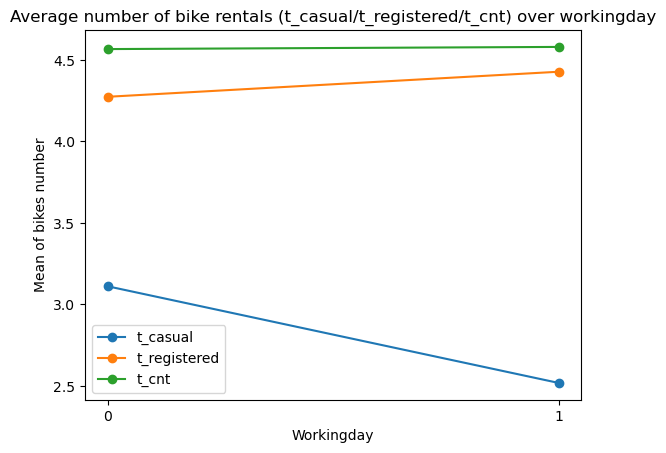

In [25]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over workingday:
workingday_casual = df.groupby('workingday')['t_casual'].mean()  # average of t_casual over workingday
workingday_registered = df.groupby('workingday')['t_registered'].mean()  # average of t_registered over workingday
workingday_cnt = df.groupby('workingday')['t_cnt'].mean()  # average of t_cnt over workingday

plt.figure()
plt.plot([0, 1], workingday_casual, label='t_casual',marker='o')
plt.plot([0, 1], workingday_registered, label='t_registered',marker='o')
plt.plot([0, 1], workingday_cnt, label='t_cnt',marker='o')
plt.xlabel("Workingday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over workingday")
plt.xticks([0, 1], ['0', '1'])  # Set the x-axis ticks and labels
plt.legend()
plt.show()

Finding:
- For casual users, the average number of rentals is lower on working days than on non-working days.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher on working days compared to non-working days.
- A similar trend as registered users is seen for the t_cnt variable, but with a smaller slope of increase on working days.

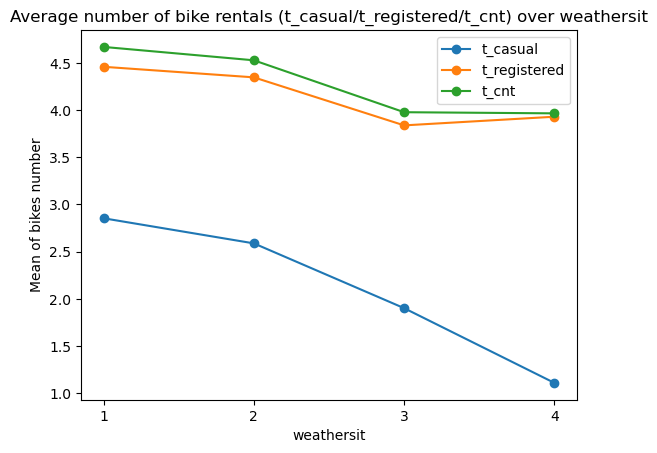

In [26]:
# Average number of transformed rentals (casual/registered/cnt) over weather situation:
weathersit_casual=df.groupby('weathersit')['t_casual'].mean() # average of t_casual over weathersit
weathersit_registered=df.groupby('weathersit')['t_registered'].mean() # average of t_registered over weathersit
weathersit_cnt=df.groupby('weathersit')['t_cnt'].mean() # average of t_cnt over weathersit

plt.figure()
plt.plot(weathersit_casual,label='t_casual',marker='o')
plt.plot(weathersit_registered,label='t_registered',marker='o')
plt.plot(weathersit_cnt, label='t_cnt',marker='o')
plt.xlabel("weathersit")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weathersit")
plt.xticks(range(1, 5), range(1, 5))  # Set the x-axis ticks and labels to show weather situation from 1 to 4
plt.legend()
plt.show()

Finding:
- The mean number of rentals for t_casual and t_registered users, as well as the t_cnt variable, shows a decreasing trend as the values of weather situations increase.

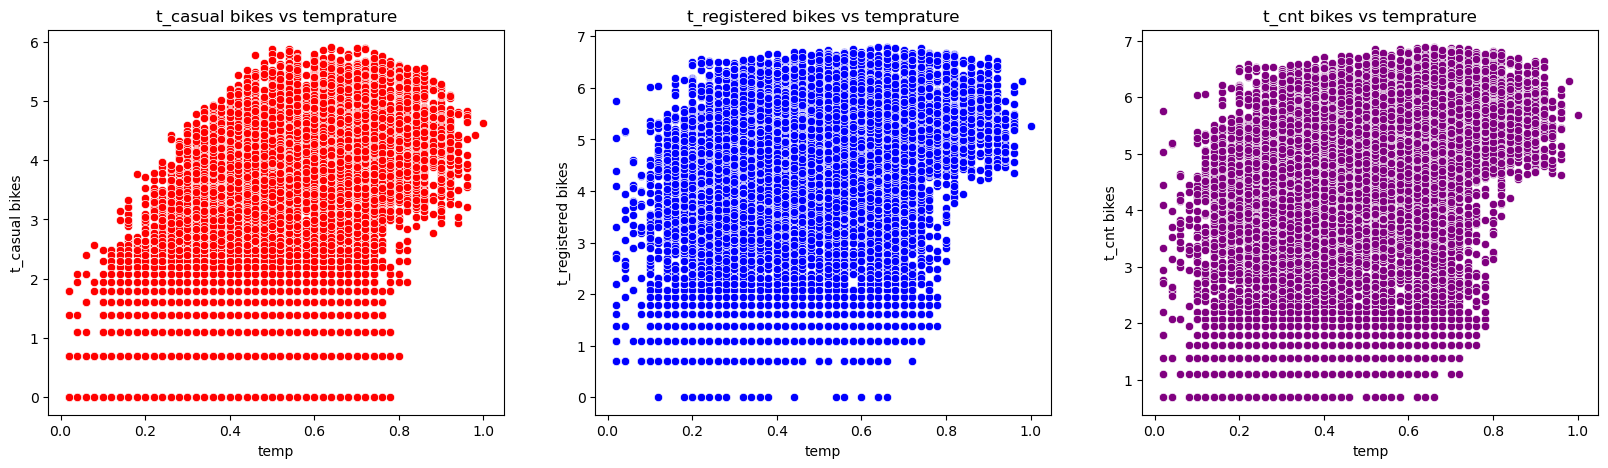

In [27]:
# relationship between transformed rental bikes users and temp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='temp', y=column, data=df, color=colors[i-1])
    plt.xlabel('temp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs temprature')
    i += 1
plt.show()  

Finding:
- The average number of bikes for t_casual and t_registered users, as well as the t_cnt field, does not exhibit notable linear correlation with temperature.

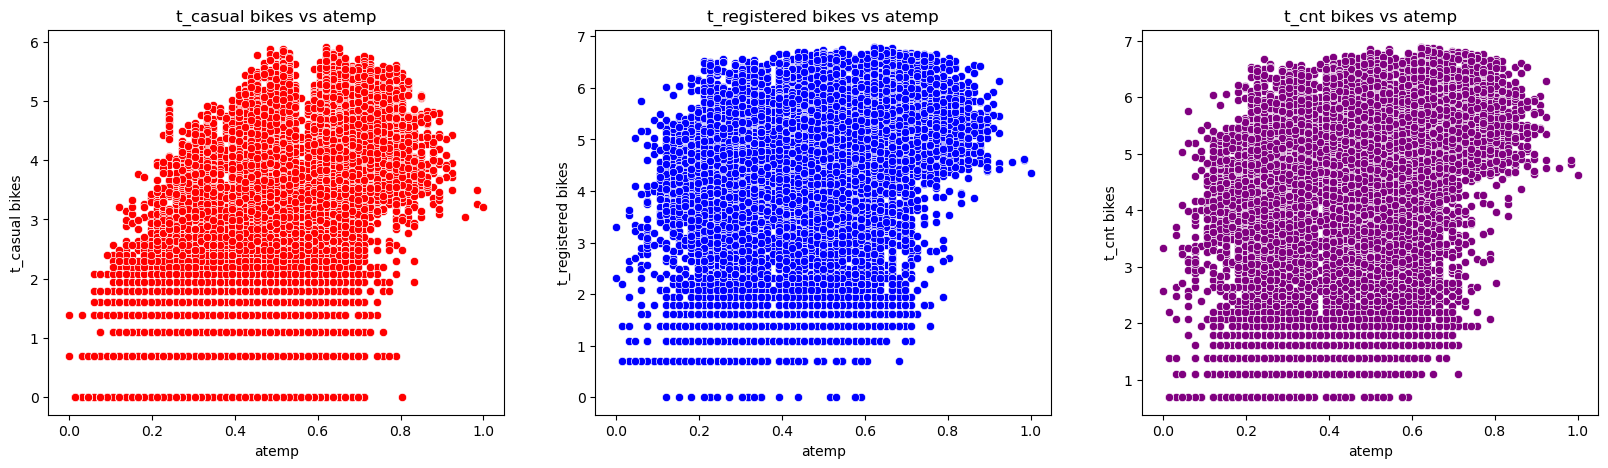

In [28]:
# relationship between transformed rental bikes users and atemp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='atemp', y=column, data=df, color=colors[i-1])
    plt.xlabel('atemp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs atemp')
    i += 1
plt.show()  

Finding:
- There is no strong linear correlation between feeling temperature and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

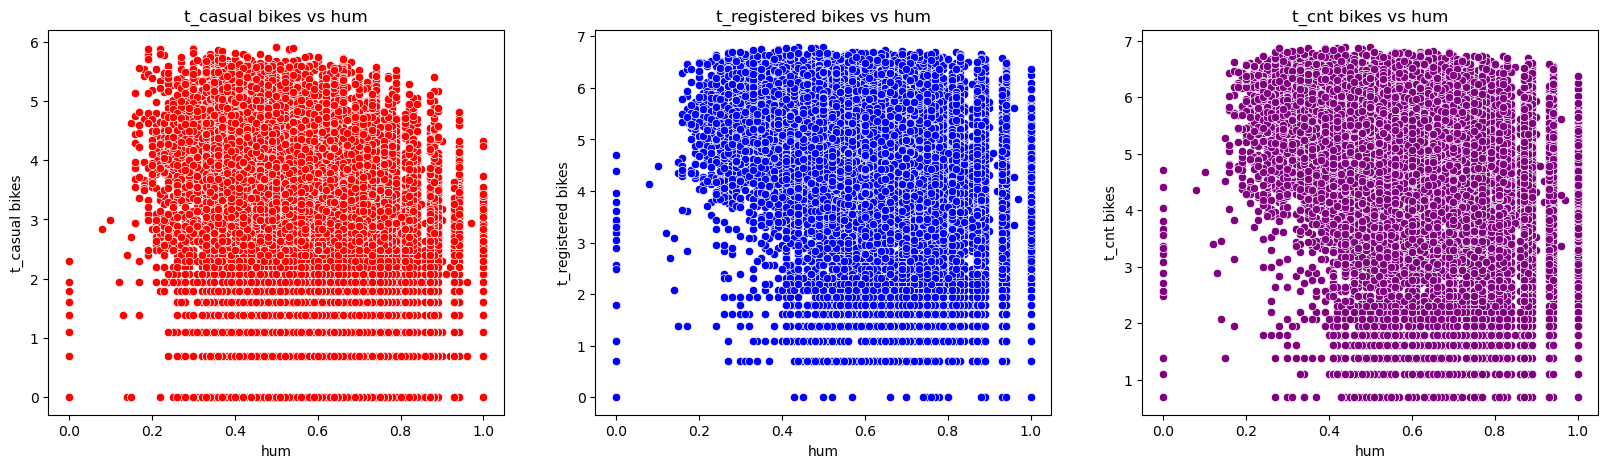

In [29]:
# relationship between transformed rental bikes users and hum
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='hum', y=column, data=df, color=colors[i-1])
    plt.xlabel('hum')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs hum')
    i += 1
plt.show()  

Finding:
- The visulas does not show a notable linear correlation between humidity and the average number of Bikes for t_casual and t_registered users as well as t_cnt filed.

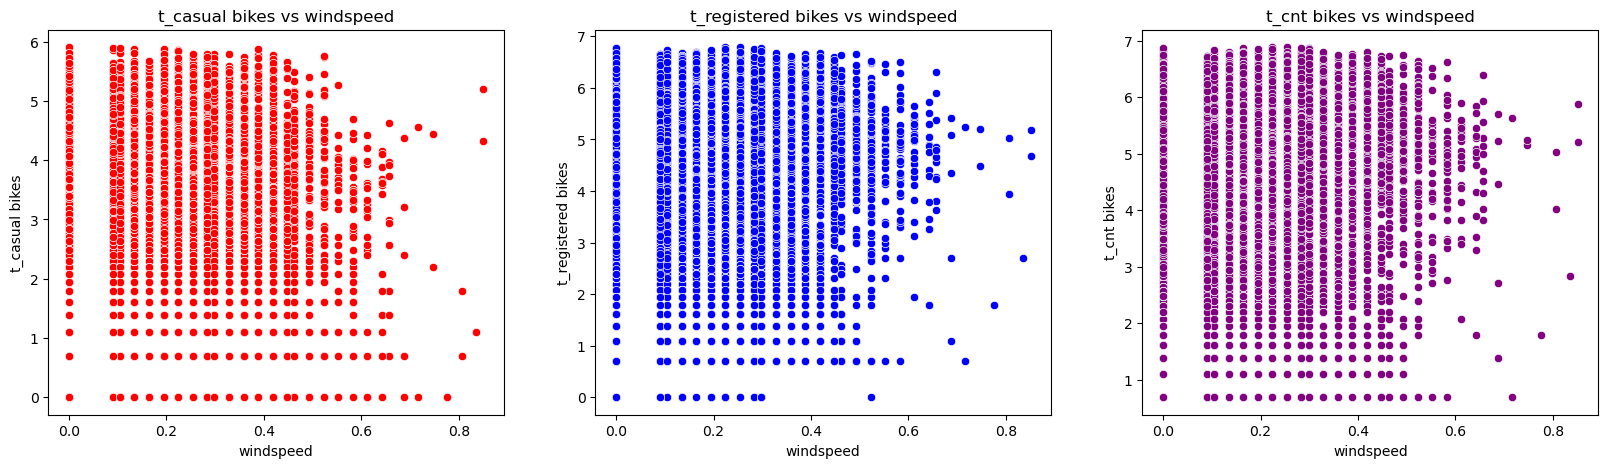

In [30]:
# relationship between transformed rental bikes users and windspeed
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='windspeed', y=column, data=df, color=colors[i-1])
    plt.xlabel('windspeed')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs windspeed')
    i += 1
plt.show()

Finding:
- The scatter plot does not display a linear correlation between windspeed and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

### Part 3: Statistical Analysis

In [31]:
# Here, we determine Which columns are positively or negatively correlated with the number of rental bikes 
# and see if they are statistically significant:
t_uers=['t_casual','t_registered','t_cnt']
for i in t_uers:
    print(f'\n correlation between number of {i} rentals and \n')
    for column in df_num.columns:
        if column in ['casual','registered','cnt']:
            continue
        else:
            t_statistic,p = stats.pearsonr(df[column],df[i])
            print(f"\t {column}: T_statistic={t_statistic:4.3f}, p_value={p:4.3f}")


 correlation between number of t_casual rentals and 

	 season: T_statistic=0.186, p_value=0.000
	 yr: T_statistic=0.111, p_value=0.000
	 mnth: T_statistic=0.121, p_value=0.000
	 hr: T_statistic=0.483, p_value=0.000
	 holiday: T_statistic=0.017, p_value=0.022
	 weekday: T_statistic=0.013, p_value=0.085
	 workingday: T_statistic=-0.185, p_value=0.000
	 weathersit: T_statistic=-0.171, p_value=0.000
	 temp: T_statistic=0.558, p_value=0.000
	 atemp: T_statistic=0.556, p_value=0.000
	 hum: T_statistic=-0.375, p_value=0.000
	 windspeed: T_statistic=0.103, p_value=0.000

 correlation between number of t_registered rentals and 

	 season: T_statistic=0.161, p_value=0.000
	 yr: T_statistic=0.180, p_value=0.000
	 mnth: T_statistic=0.112, p_value=0.000
	 hr: T_statistic=0.566, p_value=0.000
	 holiday: T_statistic=-0.037, p_value=0.000
	 weekday: T_statistic=0.034, p_value=0.000
	 workingday: T_statistic=0.051, p_value=0.000
	 weathersit: T_statistic=-0.108, p_value=0.000
	 temp: T_statistic=0.34

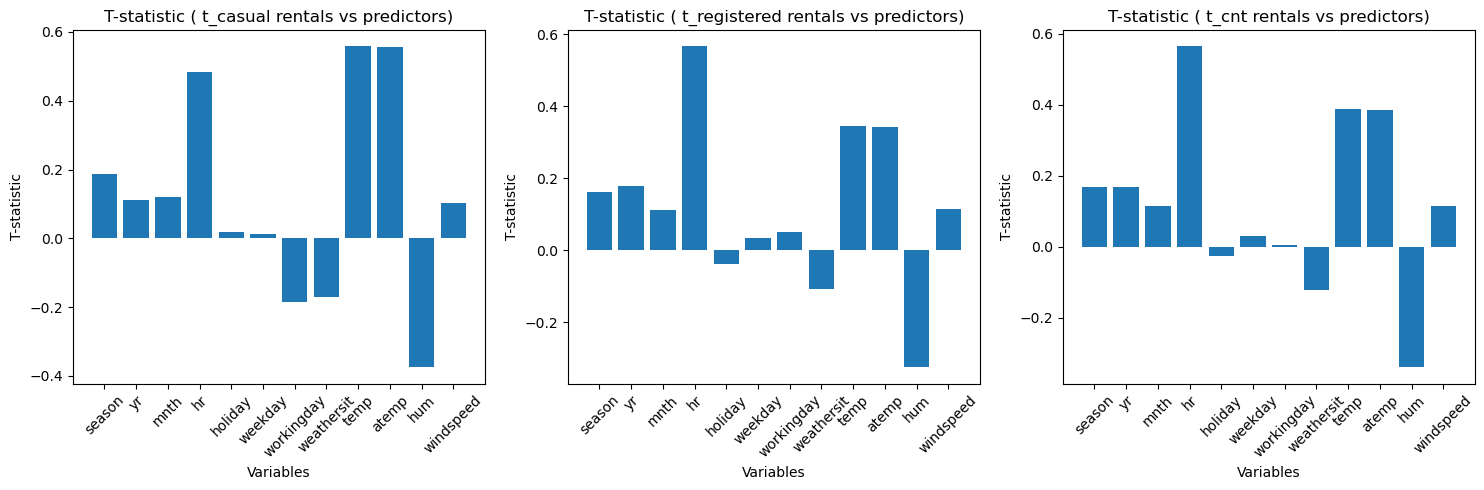

In [32]:
t_users = ['t_casual', 't_registered', 't_cnt']

# Create a dictionary to store the T-statistic values
t_statistics = {}

# Calculate T-statistic for each variable
for i in t_users:
    t_statistics[i] = {}
    for column in df_num.columns:
        if column in ['casual', 'registered', 'cnt']:
            continue
        else:
            t_statistic, p = stats.pearsonr(df[column], df[i])
            t_statistics[i][column] = t_statistic

# Create a subplot with three bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar plots for each target variable
for idx, i in enumerate(t_users):
    axs[idx].bar(t_statistics[i].keys(), t_statistics[i].values())
    axs[idx].set_xlabel('Variables')
    axs[idx].set_ylabel('T-statistic')
    axs[idx].set_title(f'T-statistic ( {i} rentals vs predictors)')
    axs[idx].tick_params(axis='x', rotation=45) 
# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Finding:
- For casual users:
   - season, yr, mnth, hr, holiday, weekday, temp, atemp, and windspeed are positively correlated with number of t_casual rentals.
   - workingday,  weathersit, and hum are negatively correlated with number of t_casual rentals.

- For registered users:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_registered rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_registered rentals.
   
   
- For 'cnt' column:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_cnt rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_cnt rentals.

- Since all the p-values are less that 0.05, we conclude that all these relations are statistically significant.
- temp, atemp, hr, and hum are the predictors with higher correlation with the three target variables.

### Part 4: Preprocessing Data before Modeling

In [38]:
# looking at our dataframe
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,t_casual,t_registered,t_cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1.386294,2.639057,2.833213
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2.197225,3.496508,3.713572
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1.791759,3.332205,3.496508
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1.386294,2.397895,2.639057
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.000000,0.693147,0.693147


In following cell, we remove unnecessary columns 'casual','registered','cnt' as we are modeling their transformed versions of them. Also 'dteday' will be redundant as we have columns for its components as years, month and day.

In [39]:
# remove dteday column and the non-transformed target variables.
# store remaining variables in dataframe `data`
data=df.drop(['dteday','casual','registered','cnt'],axis=1)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147


In following cells, dummy variables are created for some of the columns like `season`, `mnth`, `weekday`, `weathersit`, and `hr`. Although these columns have already been transformed into numerical representations, it's important to recognize that they inherently represent categorical variables. By introducing dummy variables, we enable the model to appropriately treat them as categorical predictors. After careful analysis, it's worth highlighting that this preprocessing steps performed on the data have significantly contributed to the improved performance of our models.


In [40]:
# Create dummies for column 'season'
# to avoid multicollinearity, drop one of the dummy columns (here, we drop the last one)
dummies = pd.get_dummies(data['season'])
dummies.columns=['season1','season2','season3','season4']
n_d=dummies.shape[1]-1  # calculate the number of dummy columns we keep 
dummies.iloc[:,:n_d].head() 
data_drop_season = data.drop(['season'], axis = 1)
data = pd.concat([data_drop_season, dummies.iloc[:,:n_d]], axis = 1)
data.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt,season1,season2,season3
0,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213,1,0,0
1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572,1,0,0
2,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508,1,0,0
3,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057,1,0,0
4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147,1,0,0


In [41]:
#Create dummies for column 'mnth'
# to avoid multicollinearity, drop one of the dummy columns
dummies = pd.get_dummies(data['mnth'])
dummies.columns=['mnth1','mnth2','mnth3','mnth4','mnth5','mnth6','mnth7','mnth8','mnth9','mnth10','mnth11','mnth12']
n_d=dummies.shape[1]-1  # calculate the number of dummy columns we keep 
dummies.iloc[:,:n_d].head()
data_drop_mnth = data.drop(['mnth'], axis = 1)
data = pd.concat([data_drop_mnth, dummies.iloc[:,:n_d]], axis = 1)
data.head()

,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mnth2,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11
0,0,0,0,6,0,1,0.24,0.2879,0.81,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Create dummies for column 'weekday'
# to avoid multicollinearity, drop one of the dummy columns
dummies = pd.get_dummies(data['weekday'])
dummies.columns=['weekday0','weekday1','weekday2','weekday3','weekday4','weekday5','weekday6']
n_d=dummies.shape[1]-1  # calculate the number of dummy columns we keep 
dummies.iloc[:,:n_d].head()
data_drop_weekday = data.drop(['weekday'], axis = 1)
data = pd.concat([data_drop_weekday, dummies.iloc[:,:n_d]], axis = 1)
data.head()

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,...,mnth8,mnth9,mnth10,mnth11,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5
0,0,0,0,0,1,0.24,0.2879,0.81,0.0,1.386294,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0.22,0.2727,0.80,0.0,2.197225,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,1,0.22,0.2727,0.80,0.0,1.791759,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,1,0.24,0.2879,0.75,0.0,1.386294,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,1,0.24,0.2879,0.75,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Create dummies for column 'weathersit'
# to avoid multicollinearity, drop one of the dummy columns
dummies = pd.get_dummies(data['weathersit'])
dummies.columns=['weathersit1','weathersit2','weathersit3','weathersit4']
n_d=dummies.shape[1]-1  # calculate the number of dummy columns we keep 
dummies.iloc[:,:n_d].head()
data_drop_weathersit = data.drop(['weathersit'], axis = 1)
data = pd.concat([data_drop_weathersit, dummies.iloc[:,:n_d]], axis = 1)
data.head()

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,t_casual,t_registered,...,mnth11,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weathersit1,weathersit2,weathersit3
0,0,0,0,0,0.24,0.2879,0.81,0.0,1.386294,2.639057,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0.22,0.2727,0.80,0.0,2.197225,3.496508,...,0,0,0,0,0,0,0,1,0,0
2,0,2,0,0,0.22,0.2727,0.80,0.0,1.791759,3.332205,...,0,0,0,0,0,0,0,1,0,0
3,0,3,0,0,0.24,0.2879,0.75,0.0,1.386294,2.397895,...,0,0,0,0,0,0,0,1,0,0
4,0,4,0,0,0.24,0.2879,0.75,0.0,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,0


In [44]:
#Create dummies for column 'hr' 
# to avoid multicollinearity, drop one of the dummy columns
dummies = pd.get_dummies(data['hr'])
dummies.columns=['hr0','hr1','hr2','hr3','hr4','hr5','hr6','hr7','hr8','hr9','hr10','hr11','hr12',
                'hr13','hr14','hr15','hr16','hr17','hr18','hr19','hr20','hr21','hr22','hr23']
n_d=dummies.shape[1]-1  # calculate the number of dummy columns we keep
dummies.iloc[:,:n_d].head()
data_drop_hr = data.drop(['hr'], axis = 1)
data = pd.concat([data_drop_hr, dummies.iloc[:,:n_d]], axis = 1)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
0,0,0,0,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# look at the size of our data
data.shape

(17379, 56)

In [46]:
# Save DataFrame to csv file
data.to_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 3/data_for_modeling.csv', index=False)

### Part 5: Insights on EDA
- The columns 'month' and 'season' exhibit a strong positive correlation.
- 'temp' and 'atemp' are highly correlated.
- The columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other.
- The variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution.
- It is evident that the average number of bikes rented by casual users is lower than that of registered users over the two years.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- In general, the average number of rental bikes for registered users surpasses that of casual users.
- It is evident that at the beginning and end of the week, the average number of rentals is higher compared to the middle of the week. However, the opposite behavior is observed for registered users. 
- For casual users, the average number of rentals is lower on working days than on non-working days. However, the opposite behavior is observed for registered users. 
- The mean number of rentals for both casual and registered users, as well as the total count variable, shows a decreasing trend as the values of weather situations increase.
- All the columns are significantly correlated with the three target variables.
